<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Формирование-датасета" data-toc-modified-id="Формирование-датасета-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Формирование датасета</a></span></li><li><span><a href="#Изменение-типа-данных-в-датасете" data-toc-modified-id="Изменение-типа-данных-в-датасете-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изменение типа данных в датасете</a></span></li><li><span><a href="#Проверка-на-пропуски" data-toc-modified-id="Проверка-на-пропуски-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на пропуски</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li></ul></li><li><span><a href="#Выводы-по-предобработке-данных" data-toc-modified-id="Выводы-по-предобработке-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы по предобработке данных</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Визуализация-данных" data-toc-modified-id="Визуализация-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Визуализация данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-суммы-продаж-по-месяцам" data-toc-modified-id="Изменение-суммы-продаж-по-месяцам-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Изменение суммы продаж по месяцам</a></span></li><li><span><a href="#Изменение-средней-цены-продаж-по-месяцам" data-toc-modified-id="Изменение-средней-цены-продаж-по-месяцам-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Изменение средней цены продаж по месяцам</a></span></li><li><span><a href="#Изменение-количества-проданных-единиц" data-toc-modified-id="Изменение-количества-проданных-единиц-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Изменение количества проданных единиц</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-по-исследованию-данных" data-toc-modified-id="Выводы-по-исследованию-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы по исследованию данных</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li></ul></div>

## Техническое задание

**Построение отчетов на данных о продажах товаров и услуг - одна из задач, с которыми мы сталкиваемся.**

Ожидаем увидеть отчет по продажам ТОП-3 (по встречаемости в наименованиях товаров) брендов лапши быстрого приготовления,
отчет должен содержать:
 - год
 - месяц 
 - бренд
 - количество продавцов
 - количество чеков
 - количество проданного товара
 - среднюю цену продаж
 - сумму продаж

Формат решения:
1) код на python для построения отчета, и комментарии, поясняющие ваше решение (ipynb файл)  
2) сам отчет (csv файл)

Данные доступны по ссылке:
https://disk.skbkontur.ru/index.php/s/dSRiWsX5stDDHKX

## Описание данных

В ваше распоряжение мы даем выгрузку продаж (в формате parquet), которую мы сгенерировали похоже на наши данные, содержащую следующие колонки:
 - region_code: регион
 - seller_id: идентификатор продавца
 - item_name: наименование товара
 - category: категория товара
 - cheques_cnt: количество чеков с данным товаром
 - quantity: количество проданного товара
 - avg_price_in_rub: средняя цена продажи товара в рублях
 - sum_in_rub: сумма продаж в рублях

## Предобработка данных

### Формирование датасета

Загрузим основные библиотеки для работы с данными.

In [1]:
import pandas as pd
import os
import pprint as pp
import pyarrow.parquet as pq
from functools import reduce
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

В нашем распоряжении большое количество файлов в формате parquet. Необходимо собрать 89 файлов в один. Для этого создадим список файлов, прочитаем каждый файл и добавим его в датафрейм, после этого сохраним и запишем датафрейм в новый файл формата parquet.

In [2]:
# Создаем список файлов
file_list = ['C:/Users/truel/datasets/data_kontur/date=2019-01-01.parquet', 
             'C:/Users/truel/datasets/data_kontur/date=2019-01-02.parquet', 
             'C:/Users/truel/datasets/data_kontur/date=2019-01-03.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-04.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-05.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-06.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-07.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-08.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-09.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-10.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-11.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-12.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-13.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-14.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-15.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-16.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-17.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-18.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-19.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-20.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-21.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-22.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-23.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-24.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-25.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-26.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-27.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-28.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-29.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-30.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-01-31.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-01.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-02.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-03.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-04.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-05.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-06.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-07.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-08.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-09.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-10.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-11.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-12.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-13.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-14.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-15.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-16.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-17.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-18.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-19.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-20.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-21.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-22.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-23.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-24.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-25.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-26.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-27.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-02-28.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-01.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-02.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-03.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-04.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-05.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-06.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-07.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-08.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-09.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-10.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-11.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-12.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-13.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-14.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-15.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-16.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-17.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-18.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-19.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-20.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-21.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-22.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-23.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-24.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-25.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-26.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-27.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-28.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-29.parquet',
             'C:/Users/truel/datasets/data_kontur/date=2019-03-30.parquet',]


# Извлекаем дату из названий файлов
dates = [os.path.basename(file).split('=')[1].split('.')[0] for file in file_list]


# Прочитаем каждый файл
dfs = [pd.read_parquet(file) for file in file_list]

# Добавляем столбец с датой в DataFrame
for i, df in enumerate(dfs):
    df['date'] = dates[i]

# С помощью метода concat библиотеки pandas добавляем файлы в датафрейм
combined_df = pd.concat(dfs)

# Записываем объединенный DataFrame в новый файл формата Parquet
output_file = 'combined.parquet'
combined_df.to_parquet(output_file)

Теперь необходимо конвертировать полученный датафрейм в формат csv.

In [3]:
# Читаем текущий датафрейм в формате parquet
parquet_file = 'combined.parquet'
df = pd.read_parquet(parquet_file)

# Указываем имя файла в формате CSV и записываем его в переменную
dataframe = 'data_kontur_all.csv'

# Сохраняем датафрейм в формат CSV
df.to_csv(dataframe, index=False)  # Устанавливаем index = False, чтобы не сохранять индекс строк

Данные готовы для работы.

### Изменение типа данных в датасете

Теперь посмотрим на датасет и проведем необходимую предобработку данных.

In [4]:
dataset = pd.read_csv('C:/Users/truel/datasets/data_kontur_all.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   region_code       1000000 non-null  int64  
 1   seller_id         1000000 non-null  object 
 2   item_name         1000000 non-null  object 
 3   category          1000000 non-null  object 
 4   cheques_cnt       1000000 non-null  int64  
 5   quantity          1000000 non-null  int64  
 6   avg_price_in_rub  1000000 non-null  float64
 7   sum_in_rub        1000000 non-null  float64
 8   date              1000000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 68.7+ MB


В датасете присутствуют как числовой тип данных, так и строковый. Количество строк - 1 млн, столбцов 8.

Выполним основные этапы предобработки данных.

Приведём данные в столбце date в формат datetime64[ns].

In [6]:
dataset['date'] = pd.to_datetime(dataset['date'], format="%Y.%m.%d")

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   region_code       1000000 non-null  int64         
 1   seller_id         1000000 non-null  object        
 2   item_name         1000000 non-null  object        
 3   category          1000000 non-null  object        
 4   cheques_cnt       1000000 non-null  int64         
 5   quantity          1000000 non-null  int64         
 6   avg_price_in_rub  1000000 non-null  float64       
 7   sum_in_rub        1000000 non-null  float64       
 8   date              1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 68.7+ MB


### Проверка на пропуски

In [8]:
dataset.isna().sum()

region_code         0
seller_id           0
item_name           0
category            0
cheques_cnt         0
quantity            0
avg_price_in_rub    0
sum_in_rub          0
date                0
dtype: int64

Пропусков в датасете не обнаружено.

### Проверка на дубликаты

In [9]:
dataset.duplicated().sum()

0

Явных дубликатов в датасете не обнаружено.

## Выводы по предобработке данных

**В результате преодобработки были проведены следующие действия:**  
1) 89 файлов формата parquet были объединены в новый датафрейм;  
2) Датафрейм сохранен в формат CSV;  
3) Добавленные данные по дате из названий файлов в отдельный столбец - date;  
4) Столбец date приведен в формат datetime64[ns];  
4) Выполнена проверка на пропуски, пропусков в датасете не обнаружено;  
5) Выполнена проверка на дубликаты, дубликаты также не обнаружены в датасете.  

## Исследование данных

**В соответствии с ТЗ необходимо сделать следующее**

Ожидаем увидеть отчет по продажам ТОП-3 (по встречаемости в наименованиях товаров) брендов лапши быстрого приготовления,
отчет должен содержать:
 - год
 - месяц 
 - бренд
 - количество продавцов
 - количество чеков
 - количество проданного товара
 - среднюю цену продаж
 - сумму продаж


In [10]:
dataset.head()

,region_code,seller_id,item_name,category,cheques_cnt,quantity,avg_price_in_rub,sum_in_rub,date
0,66,2ea77a3b-4716-4f88-8b76-c3325043a5d2,"Молоко ультрапастеризованное 2,5% 900г тетра-фино шт",Молоко,2,14,49.87,698.18,2019-01-01
1,63,58199d0d-141e-46ad-8a0b-c609ee36baac,7517 Лапша на домашнем бульоне Говядина Роллтон 60г пакет,Продукты на основе теста,5,6,7.89,47.34,2019-01-01
2,70,f6d86f91-8d5c-4f27-b820-a9e6e9b25c98,"Молоко пастеризованное 3,2-4% 2 л.",Молоко,5,17,162.87,2768.79,2019-01-01
3,71,322203bd-9323-4c20-8e4b-a6cc029d6261,МАKФА Мак. изд. Ракушки 400гр./20,Паста,10,12,69.75,837.00,2019-01-01
4,63,d54890e7-049d-4d74-9bf0-27a376785d93,"Изделия макар.""Перо"" (В) в/с 400г",Паста,9,11,4.11,45.21,2019-01-01


In [11]:
# Создаем фильтр, чтобы найти строки содержащие значения 'лапши быстрого приготовления' в столбце item_name
# Параметр case выставляем в значение False,для того чтобы сделать наш поиск не чувствительным к регистру
#и следовательно более полным

filter = dataset['item_name'].str.contains('лапша быстрого приготовления', case=False)

# Применяем фильтр и получаем отфильтрованный датасет

filltered_dataset = dataset[filter]
filltered_dataset

,region_code,seller_id,item_name,category,cheques_cnt,quantity,avg_price_in_rub,sum_in_rub,date
1384,72,c5b71201-e875-4da2-a794-eeca95a3964a,лапша быстрого приготовления Доширак вкус курицы 70г,Продукты на основе теста,1,3,5.56,16.68,2019-01-01
2713,54,f1f9a708-6bcd-4b0e-ae4d-e07fb855d4ba,"Лапша быстрого приготовления куриный ""Анаком"" 60г.",Паста,3,3,4.48,13.44,2019-01-01
2782,63,ec2fe225-699b-4cf8-a1e0-626c3a2d8d0c,Доширак Лапша быстрого приготовления Вкус курицы 70г,Продукты на основе теста,14,14,14.94,209.16,2019-01-01
3111,58,c3a9fcd1-71bd-4d11-b5f2-30f0817f5582,"Лапша быстрого приготовления ""Доширак"" 90г говядина",Продукты на основе теста,6,14,55.47,776.58,2019-01-01
3650,66,71fb8273-2695-42ed-a3ac-614d79c718c5,"Лапша быстрого приготовления курица 110 [16] ""Доширак С шт",Продукты на основе теста,9,12,54.98,659.76,2019-01-01
...,...,...,...,...,...,...,...,...,...
991210,66,15a035df-30d1-4028-93e0-8b6c42e37270,"Лапша быстрого приготовления яичная ""по-домашнему"" ""Роллтон"" 400",Продукты на основе теста,1,1,133.36,133.36,2019-03-30
995172,60,7b22bb11-e483-4c43-b9ad-fc0bcb61b36d,"ЛАПША БЫСТРОГО ПРИГОТОВЛЕНИЯ ""ДОШИРАК"" ВКУС в ассорт.",Продукты на основе теста,1,1,19.75,19.75,2019-03-30
997501,75,28843c34-4647-47c2-937e-5537a525e2a9,"Лапша быстрого приготовления ""big bon"" говядина соус ""гуляш"" 75г",Продукты на основе теста,3,3,10.56,31.68,2019-03-30
998808,67,1c8b93be-0032-499c-bd00-10295c4b7605,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 75г",Продукты на основе теста,2,5,15.30,76.50,2019-03-30


После фильтрации осталось 650 строк.

In [12]:
# Создаем столбцы year и month на основе данных из столбца date

filltered_dataset['year'] = filltered_dataset['date'].dt.year
filltered_dataset['month'] = filltered_dataset['date'].dt.month

In [13]:
filltered_dataset

,region_code,seller_id,item_name,category,cheques_cnt,quantity,avg_price_in_rub,sum_in_rub,date,year,month
1384,72,c5b71201-e875-4da2-a794-eeca95a3964a,лапша быстрого приготовления Доширак вкус курицы 70г,Продукты на основе теста,1,3,5.56,16.68,2019-01-01,2019,1
2713,54,f1f9a708-6bcd-4b0e-ae4d-e07fb855d4ba,"Лапша быстрого приготовления куриный ""Анаком"" 60г.",Паста,3,3,4.48,13.44,2019-01-01,2019,1
2782,63,ec2fe225-699b-4cf8-a1e0-626c3a2d8d0c,Доширак Лапша быстрого приготовления Вкус курицы 70г,Продукты на основе теста,14,14,14.94,209.16,2019-01-01,2019,1
3111,58,c3a9fcd1-71bd-4d11-b5f2-30f0817f5582,"Лапша быстрого приготовления ""Доширак"" 90г говядина",Продукты на основе теста,6,14,55.47,776.58,2019-01-01,2019,1
3650,66,71fb8273-2695-42ed-a3ac-614d79c718c5,"Лапша быстрого приготовления курица 110 [16] ""Доширак С шт",Продукты на основе теста,9,12,54.98,659.76,2019-01-01,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
991210,66,15a035df-30d1-4028-93e0-8b6c42e37270,"Лапша быстрого приготовления яичная ""по-домашнему"" ""Роллтон"" 400",Продукты на основе теста,1,1,133.36,133.36,2019-03-30,2019,3
995172,60,7b22bb11-e483-4c43-b9ad-fc0bcb61b36d,"ЛАПША БЫСТРОГО ПРИГОТОВЛЕНИЯ ""ДОШИРАК"" ВКУС в ассорт.",Продукты на основе теста,1,1,19.75,19.75,2019-03-30,2019,3
997501,75,28843c34-4647-47c2-937e-5537a525e2a9,"Лапша быстрого приготовления ""big bon"" говядина соус ""гуляш"" 75г",Продукты на основе теста,3,3,10.56,31.68,2019-03-30,2019,3
998808,67,1c8b93be-0032-499c-bd00-10295c4b7605,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 75г",Продукты на основе теста,2,5,15.30,76.50,2019-03-30,2019,3


In [14]:
# Группируем данные по столбцам year, month и item_name

filltered_dataset = filltered_dataset.groupby(['year', 'month', 'item_name']).agg({
    'seller_id': 'nunique',  # количество продавцов
    'cheques_cnt': 'count',  # количество чеков
    'quantity': 'sum',      # количество проданного товара
    'avg_price_in_rub': 'mean',  # средняя цена продаж
    'sum_in_rub': 'sum'  # сумма продаж
}).reset_index()

# Сортировка данных по сумме продаж и отбор ТОП-3 брендов
top_brands = filltered_dataset.groupby('item_name').sum_in_rub.sum().nlargest(3).index
top_noodles = filltered_dataset[filltered_dataset['item_name'].isin(top_brands)]

# Вывод полученного отчета
display(top_brands)
display(top_noodles)

Index(['Лапша быстрого приготовления "big bon" курица соус "сальса" 75г',
       'Лапша быстрого приготовления яичная "Rollton" 400г',
       'Лапша быстрого приготовления "big bon" курица соус "сальса" 85г'],
      dtype='object', name='item_name')

,year,month,item_name,seller_id,cheques_cnt,quantity,avg_price_in_rub,sum_in_rub
39,2019,1,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 75г",8,8,40,32.762500,1291.95
41,2019,1,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 85г",7,7,52,50.501429,2726.07
109,2019,1,"Лапша быстрого приготовления яичная ""Rollton"" 400г",6,6,44,87.796667,3704.38
146,2019,2,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 75г",17,17,161,31.774706,4968.03
147,2019,2,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 85г",5,5,74,41.588000,3114.12
215,2019,2,"Лапша быстрого приготовления яичная ""Rollton"" 400г",13,13,79,66.914615,4630.27
255,2019,3,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 75г",13,14,115,29.542857,3615.83
256,2019,3,"Лапша быстрого приготовления ""big bon"" курица соус ""сальса"" 85г",11,11,67,41.233636,2528.55
329,2019,3,"Лапша быстрого приготовления яичная ""Rollton"" 400г",2,2,5,36.675000,181.06


Сделаем выгрузку данного отчёта в отдельный файл формата csv.

In [15]:
# Указываем имя файла в формате CSV и записываем его в переменную

report = 'report_top_noodles.csv'

# Сохраняем датафрейм в формат CSV
top_noodles.to_csv(report, index=False)  # Устанавливаем index = False, чтобы не сохранять индекс строк

Отчёт готов. Отобразим полученный отчёт на графиках.

### Визуализация данных

#### Изменение суммы продаж по месяцам

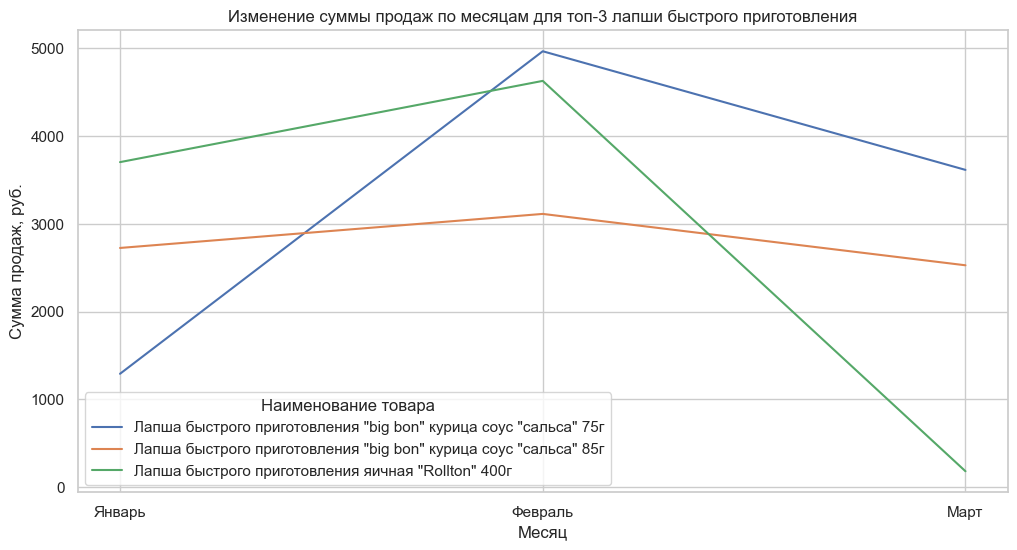

In [16]:
# Устанавливаем стиль графика
sns.set(style="whitegrid")

# Создаем график и прописываем основные параметры
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_noodles, x="month", y="sum_in_rub", hue="item_name")

# Настраиваем метки и заголовок
plt.title("Изменение суммы продаж по месяцам для топ-3 лапши быстрого приготовления")
plt.xlabel("Месяц")
plt.ylabel("Сумма продаж, руб.")

# Включаем легенду на графике
plt.legend(title="Наименование товара")

# Устанавливаем метки для оси X, подписываем названия месяцев
plt.xticks([1, 2, 3], ['Январь', 'Февраль', 'Март'])

# Выводим график на экран
plt.show()

Как видно на данном графике продажи лапши не являются однородными. В январе лидером продаж была лапша - Лапша быстрого приготовления яичная "Rollton" 400г', а в аутсайдерах - 'Лапша быстрого приготовления "big bon" курица соус "сальса" 75г'.

В феврале ситуация изменилась и в топе уже был аутсайдер. Возможно данная ситуация связана с запуском маркетинговой компании, что привело к увеличению продаж. Самый стабильный показатель продаж - Лапша быстрого приготовления "big bon" курица соус "сальса" 85г, значения меняются не значительным образом за все три месяца.

#### Изменение средней цены продаж по месяцам

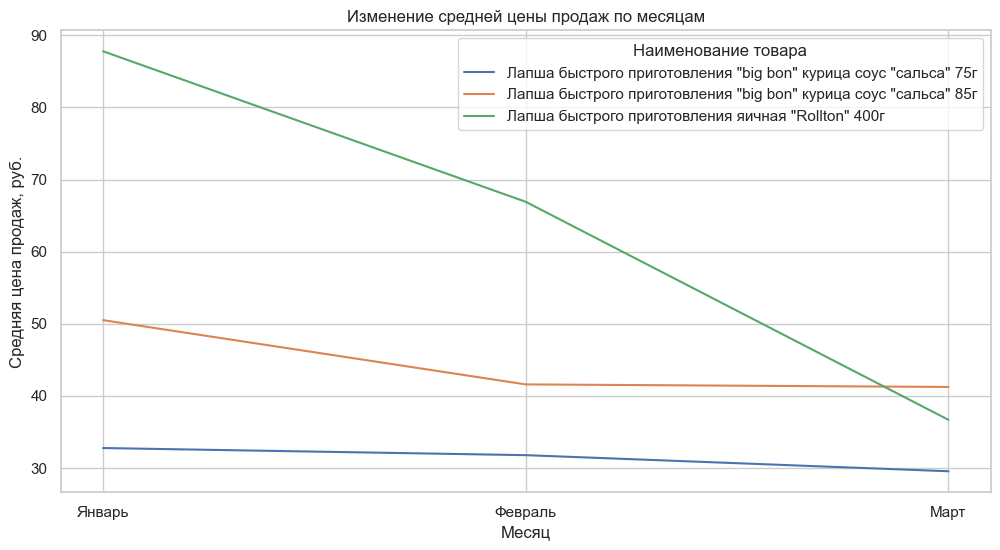

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_noodles, x="month", y="avg_price_in_rub", hue="item_name")

plt.title("Изменение средней цены продаж по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Средняя цена продаж, руб.")

plt.legend(title="Наименование товара")

plt.xticks([1, 2, 3], ['Январь', 'Февраль', 'Март'])

plt.show()

На графике явно заметная тенденция к снижению средней цены продажи для всех трех видов лапши. Наибольшее падение наблюдаем у Лапша быстрого приготовления яичная "Rollton" 400г.

#### Изменение количества проданных единиц

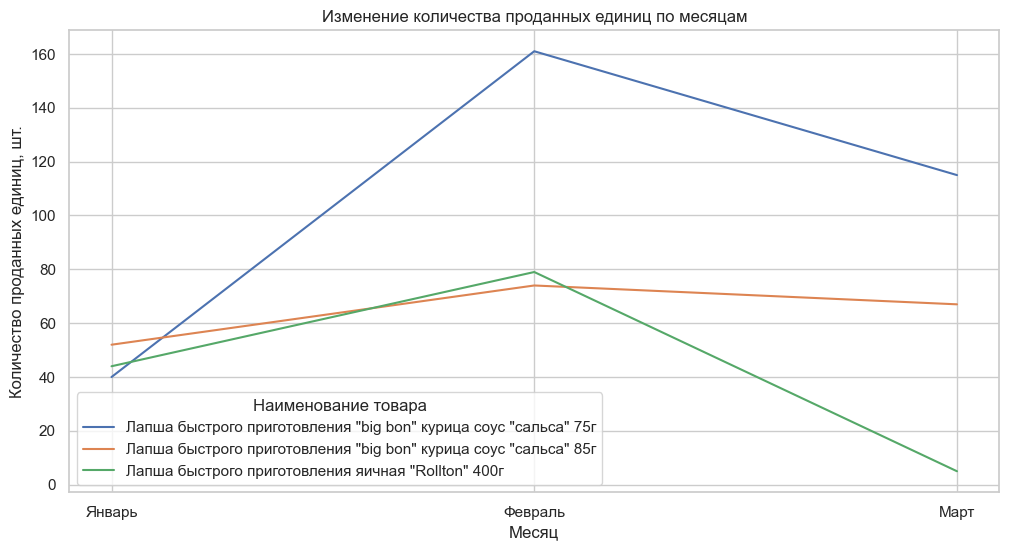

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_noodles, x="month", y="quantity", hue="item_name")

plt.title("Изменение количества проданных единиц по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество проданных единиц, шт.")

plt.legend(title="Наименование товара")

plt.xticks([1, 2, 3], ['Январь', 'Февраль', 'Март'])

plt.show()

Наибольший рост по количеству проданных единиц показывает - Лапша быстрого приготовления "big bon" курица соус "сальса" 75г, однако после февраля месяца начинается спад продаж для всех трех видов лапши.

## Выводы по исследованию данных

**В результате анализа данных были выявлены топ 3 товара(по встречаемости в наименованиях товаров) брендов лапши быстрого приготовления:**
1) Лапша быстрого приготовления "big bon" курица соус "сальса" 75г;  
2) Лапша быстрого приготовления яичная "Rollton" 400г';  
3) Лапша быстрого приготовления "big bon" курица соус "сальса" 85г'  

Сформирован отчёт в соотстветствии с ТЗ.
Визуализированы данные, путём построения трех различных графиков. Сделаны выводы на основе графиков, даны пояснения и предположения наблюдаемых тенденций.

## Общий вывод по проекту

**В результате работы с текущим проектом была проделана следующая работа:**

1) Из 89 файлов формата parquet собран единный датасет в формате csv с которым намного удобнее и проще работать;  
2) Выполнены все основные этапы предобработки данных, сделаны выводы о том ,что данные чистые и с ними можно работать;  
3) Было проведено исследование данных в соответствии с ТЗ;  
4) Получен отчёт содержащий данные описанные в ТЗ;  
5) Построены визуализации, позволяющие более наглядно увидеть различные показатели и сделать определенные выводы.  